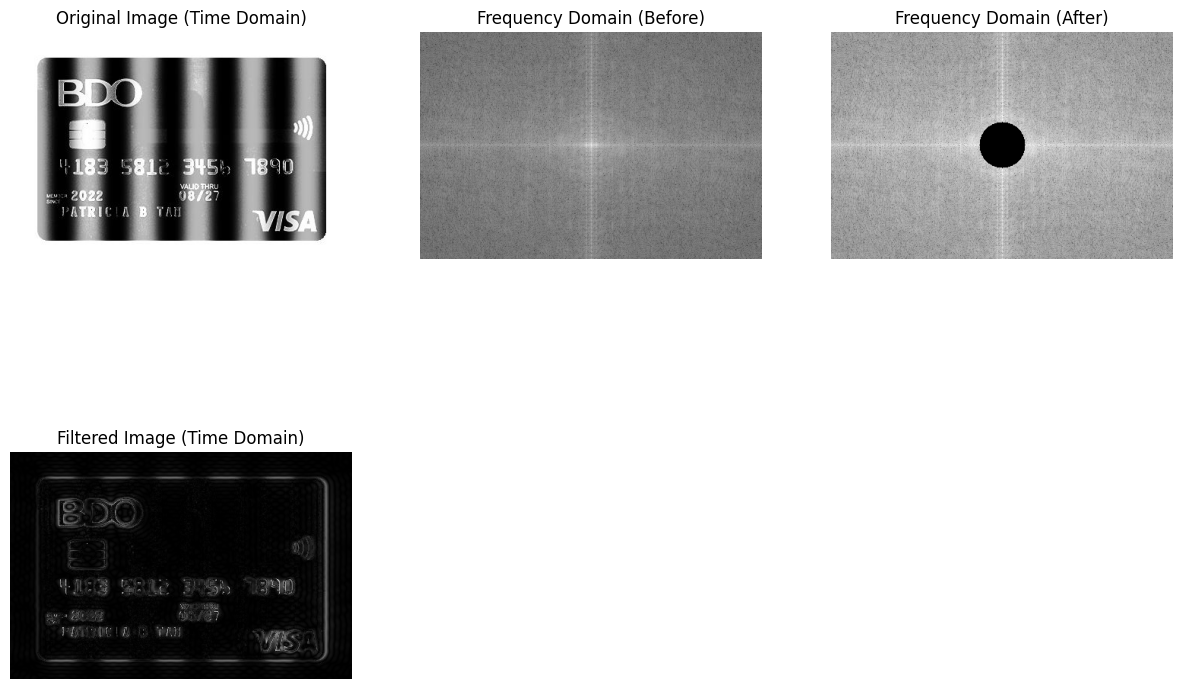

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_frequency_noise(image_path, threshold=30):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Create a mask to filter out high frequencies
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    r = threshold
    center = [crow, ccol]
    y, x = np.ogrid[:rows, :cols]
    dist = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    mask[dist <= r] = 0
    
    # Apply mask to the frequency domain representation
    f_transform_filtered = f_transform_shifted * mask
    
    # Inverse Fourier Transform to get the image back
    f_transform_ishifted = np.fft.ifftshift(f_transform_filtered)
    img_back = np.fft.ifft2(f_transform_ishifted)
    img_back = np.abs(img_back)
    
    # Convert grayscale to RGB
    img_back_rgb = cv2.cvtColor(img_back.astype(np.uint8), cv2.COLOR_GRAY2RGB)
    
    return image, f_transform_shifted, f_transform_filtered, img_back_rgb

def magnitude_spectrum(f_transform):
    magnitude = np.abs(f_transform)
    magnitude_spectrum = 20 * np.log(magnitude + 1)
    return magnitude_spectrum

# Usage
original_image, f_transform_before, f_transform_after, filtered_image_rgb = remove_frequency_noise('12 - weewooweewoo.jpg', threshold=30)

# Display images
plt.figure(figsize=(15, 10))

# Original image in time domain
plt.subplot(2, 3, 1)
plt.title('Original Image (Time Domain)')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB))
plt.axis('off')

# Frequency domain before noise removal
plt.subplot(2, 3, 2)
plt.title('Frequency Domain (Before)')
magnitude_spectrum_before = magnitude_spectrum(f_transform_before)
plt.imshow(magnitude_spectrum_before, cmap='gray', vmin=0, vmax=np.max(magnitude_spectrum_before))
plt.axis('off')

# Frequency domain after noise removal
plt.subplot(2, 3, 3)
plt.title('Frequency Domain (After)')
magnitude_spectrum_after = magnitude_spectrum(f_transform_after)
plt.imshow(magnitude_spectrum_after, cmap='gray', vmin=0, vmax=np.max(magnitude_spectrum_after))
plt.axis('off')

# Filtered image in time domain
plt.subplot(2, 3, 4)
plt.title('Filtered Image (Time Domain)')
plt.imshow(filtered_image_rgb)
plt.axis('off')

plt.show()
